In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

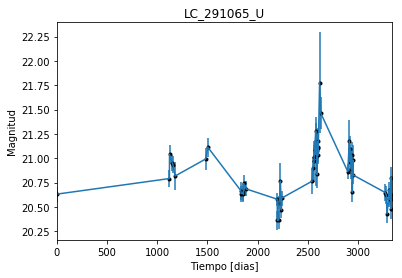

In [2]:
data = np.genfromtxt('LC_291065_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_291065_U')
plt.savefig("LC_291065_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

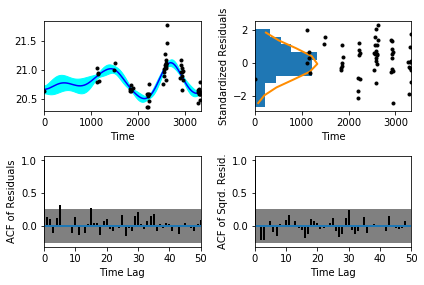

In [5]:
sample.assess_fit()

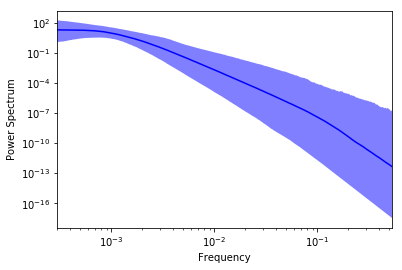

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

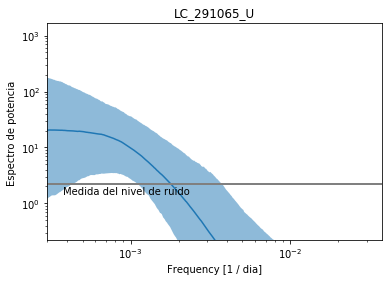

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_291065_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_291065_U')

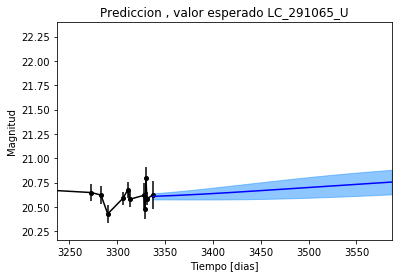

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_291065_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_291065_U')

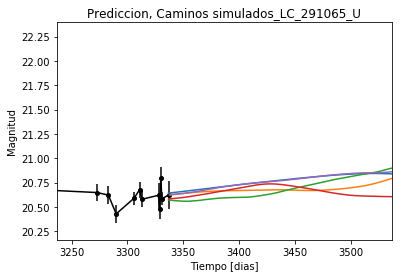

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_291065_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


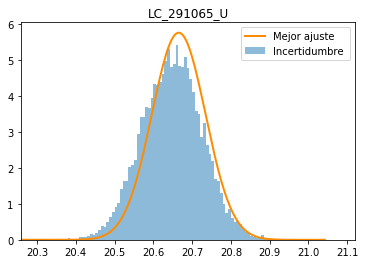

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_291065_U')
plt.savefig("Mejor_ajuste_LC_285764_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_291065_U')

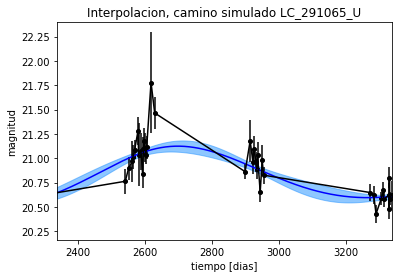

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_U')

Text(0.5,1,'Interpolacion, camino simulado LC_291065_U')

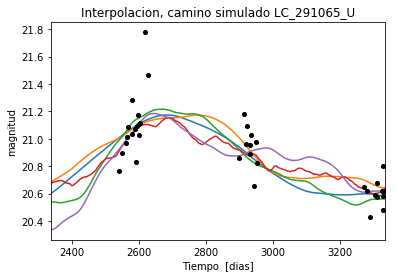

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 576.684216729
Median: 0.00252988987612
Standard deviation: 0.170655572959
68% credibility interval: [ 0.00044262  0.0879486 ]
95% credibility interval: [  3.18429990e-04   7.25871749e-01]
99% credibility interval: [  3.04898045e-04   9.82588965e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1192.40515936
Median: 0.00101031144784
Standard deviation: 0.0791315711011
68% credibility interval: [ 0.00039611  0.01449072]
95% credibility interval: [ 0.00031374  0.22550141]
99% credibility interval: [  3.03467756e-04   6.20072666e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 281.819979789
Median: 0.00665374174849
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 855.740346626
Median: 58.1301438016
Standard deviation: 1.86643754005
68% credibility interval: [ 56.23945317  59.82828354]
95% credibility interval: [ 53.7874107   61.19772436]
99% credibility interval: [ 51.81218304  61.75518837]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 235.714729561
Median: 0.428448353031
Standard deviation: 1.90121000276
68% credibility interval: [ 0.02963566  2.94363755]
95% credibility interval: [ 0.01162521  6.60462937]
99% credibility interval: [ 0.00904138  8.97746391]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 872.558497351
Median: 0.0897329060257
Standard deviation: 8.27460266998
68% credibility interval: [  2.50335351e-03   4.95285365e+00]
95% credibility interval: [  1.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1179.68256574
Median: 9.52431788618e-24
Standard deviation: 8.23183237724e+83
68% credibility interval: [  1.06432645e-60   3.70846393e+15]
95% credibility interval: [  7.10942480e-99   3.74775227e+48]
99% credibility interval: [  3.80858271e-102   2.53183302e+053]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4424.98893034
Median: 20.7854785597
Standard deviation: 0.118223869747
68% credibility interval: [ 20.69220274  20.86608433]
95% credibility interval: [ 20.52086773  21.00532524]
99% credibility interval: [ 20.33362588  21.18242334]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 404.267447214
Median: 0.00108049833126
Standard deviation: 0.232969416175
68% credibility interval: [ 0.          0.27470861]
95% credibility interval: [ 0.          0.87549504]
99% credibility interval: [ 0.          1.02936626]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 404.267447214
Median: 0.00108049833126
Standard deviation: 0.232969416175
68% credibility interval: [ 0.          0.27470861]
95% credibility interval: [ 0.          0.87549504]
99% credibility interval: [ 0.          1.02936626]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 798.616926109
Median: 0.0
Standard deviation: 0.000480520927961
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 855.740346626
Median: 58.1301438016
Standard deviation: 1.86643754005
68% credibility interval: [ 56.23945317  59.82828354]
95% credibility interval: [ 53.7874107   61.19772436]
99% credibility interval: [ 51.81218304  61.75518837]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1955.35605497
Median: 0.0532835574372
Standard deviation: 0.0775953227033
68% credibility interval: [ 0.0297136   0.10813337]
95% credibility interval: [ 0.01780799  0.27746206]
99% credibility interval: [ 0.01357934  0.53257523]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2102.66692347
Median: 1.04228300743
Standard deviation: 0.152110659291
68% credibility interval: [ 0.9047835   1.20552804]
95% credibility interval: [ 0.79355262  1.38362863]
99% credibility interval: [ 0.74311001  1.52795758]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1122.07179999
Median: 1.53245419866e-05
Standard deviation: 0.0398164708396
68% credibility interval: [  1.25029561e-19   1.61665848e-03]
95% credibility interval: [  3.94530558e-54   2.14328854e-02]
99% credibility interval: [  2.34332168e-57   1.77943645e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 576.684216729
Median: (-0.0158957668984-0.00953805963886j)
Standard deviation: 1.814503781
68% credibility interval: [-0.55259735-2.10709234j -0.00278106-0.00284998j]
95% credibility interval: [ -4.56078671e+00+0.j          -2.00075463e-03-0.00349593j]
99% credibility interval: [ -6.17378855e+00+0.j          -1.91573092e-03-0.00171458j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1192.40515936
Median: (-0.00634797404474+0.00437886298698j)
Standard deviation: 1.54592605762
68% credibility interval: [-0.09104786+0.947445j   -0.00248881+0.04736802j]
95% credibility interval: [-1.41686713 +3.20251182e+00j -0.00197131 +2.37827201e-03j]
99% credibility interval: [ -3.89603146e+00+2.37877668j  -1.90674414e-03+0.00338821j]